**Problem Statement**: Predicting the retail customer retention potential level as high/medium/low & Customer Segmentation & Pattern extraction

The bussiness problem is to classify customers of a retail company as High/Medium/Low under the target attribute "RetentionPotential" in order to identify those customers who are at risk of leaving and take suitable measures to retain them.

Additionally, the problem aims to segment customers based on their retention potential for strategic purposes. By doing so, the retail company can develop targeted marketing programs and improve customer engagement, thereby increasing customer retention, sales, and profitability.

<hr/>

 **Customer Retential Potential Level** (Classification Task )

<hr/>

### Table of Contents
1. [Overview](#ch1)
1. [Dataset](#ch2)
1. [Merging the files](#ch3)
1. [Analyze and Preprocessing the df](#ch4)
1. [Checking for Outliers, Skewness and Correalation](#ch5)
1. [Train Test Split](#ch6)
1. [Creating & Training the Model](#ch7)
1. [Evaluation on Test Data](#ch8)
1. [Predicting the Customer Retential Potential Level](#ch9)
1. [Pickle file](#ch10)
1. [Clustering](#ch11)

<a id="ch1"></a>
## Overview 
<hr/>

One of the objectives of this notebook is to **show step-by-step how analyzing the dataset to Customer Retential Potential Level.**






The following questions will be answered throughout the Kernel by using the dataset ***df***:
* ***Which features are available in the dataset?***
* ***Which features are categorical?***
* ***Which features are numerical?***
* ***Which features contain blank, null or empty values?***
* ***What are the data types for various features?***
* ***What is the distribution of numerical feature values across the samples?***
* ***Which features are more correlated to the price?***

<a id="ch1"></a>
## Dataset 
<hr/>


**Customer Retential Potential dataset** Give some attributes we have to predict the **Customer Retential Potential level**.

There are 18 attributes which represents the following -

**CustomerID:** A unique identifier assigned to each customer in the database.

**City:** The city where the customer is located. 

**OnlineCommunication**: A binary variable that indicates whether the customer has communicated with the company online.

**AutomaticRefill:** A binary variable that indicates whether the customer has opted for automatic refill of their orders.

**DoorstepDelivery:** A binary variable that indicates whether the customer has opted for doorstep delivery of their orders.

**PreferredDeliveryDay:** The day of the week on which the customer prefers to receive their orders.

**Welcome_email_opened:** A binary variable that indicates whether the customer has opened the welcome email sent by the company.

**No_of_customized_email:** The number of customized emails sent to the customer.

**No_of_customized_email_opened:** The number of customized emails opened by the customer.

**No_of_customized_email_clicked:** The number of links clicked by the customer in the customized emails.

**RetentionPotential**: A classification that predicts the likelihood of the customer to continue using the company's services.

**TotalOrderQuantity:** The total quantity of orders placed by the customer.

**OrderFrequency:** The frequency of orders placed by the customer.

**Average_Ordergap:** The average time between orders placed by the customer.

**no_of_BusinessDays:** The number of business days between orders placed by the customer.

**DateOfRegistration:** The date on which the customer registered with the company or created an account.

**DateOfOrder:** The date on which the customer placed an order or made a purchase.

**Timestamp:** A column that contains the exact date and time at which an event occurred.

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Train data

In [ ]:
train=pd.read_excel("/content/drive/MyDrive/Hackathon/Train.xlsx")
transaction=pd.read_excel("/content/drive/MyDrive/Hackathon/transactionsdata_Train.xlsx")
customer=pd.read_excel("/content/drive/MyDrive/Hackathon/Customerdata_Train.xlsx")
email=pd.read_excel("/content/drive/MyDrive/Hackathon/Emaildata_Train.xlsx")
print(train.shape)
print(transaction.shape)
print(customer.shape)
print(email.shape)

(23820, 2)
(104755, 4)
(23820, 7)
(517672, 6)


## Train


In [ ]:
train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [ ]:
train.isnull().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          23820 non-null  object
 1   RetentionPotential  23820 non-null  object
dtypes: object(2)
memory usage: 372.3+ KB


In [ ]:
train.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

In [ ]:
train.describe()

,CustomerID,RetentionPotential
count,23820,23820
unique,23820,3
top,C37869,Low
freq,1,19185


In [ ]:
train_ids=train['CustomerID']

In [ ]:
train_ids

0        C37869
1        C33841
2        C29464
3        C28158
4        C22785
          ...  
23815    C14975
23816    C30392
23817    C41735
23818    C26055
23819    C25058
Name: CustomerID, Length: 23820, dtype: object

## Customer

In [ ]:
customer.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [ ]:
customer.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
customer.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [ ]:
customer.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615
std,0.473580,0.292821,0.190268
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


## Transaction


In [ ]:
transaction.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [ ]:
transaction.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104755 entries, 0 to 104754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     104755 non-null  object
 1   DateOfOrder    104755 non-null  object
 2   timestamp      104755 non-null  object
 3   OrderQuantity  104755 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [ ]:
transaction.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

In [ ]:
transaction.describe()

,OrderQuantity
count,104755.000000
mean,81.319059
std,46.853569
min,0.000000
25%,50.000000
50%,71.000000
75%,100.000000
max,1501.000000


In [ ]:
transaction=transaction.drop(["timestamp"],axis=1)

In [ ]:
# Convert dateoforder to datetime format
transaction['DateOfOrder'] = pd.to_datetime(transaction['DateOfOrder'])
transaction =transaction.sort_values(['CustomerID', 'DateOfOrder'])
transaction.head()

,CustomerID,DateOfOrder,OrderQuantity
73908,C12116,2013-10-03,38
73909,C12116,2013-10-08,44
73910,C12116,2013-10-10,33
81596,C12117,2013-12-05,41
71421,C12118,2013-09-10,41


In [ ]:
# Group the transactions by 'CustomerID' and extract the first and last order dates for each group
first_order = transaction.groupby('CustomerID')['DateOfOrder'].min().reset_index()
last_order = transaction.groupby('CustomerID')['DateOfOrder'].max().reset_index()

# Merge the first_order and last_order DataFrames
transaction_1 = pd.merge(first_order, last_order, on='CustomerID')

# Rename the columns
transaction_1.columns = ['CustomerID', 'firstOrder', 'lastOrder']

# Print the result
transaction_1

,CustomerID,firstOrder,lastOrder
0,C12116,2013-10-03,2013-10-10
1,C12117,2013-12-05,2013-12-05
2,C12118,2013-09-10,2013-09-10
3,C12119,2013-10-22,2013-10-22
4,C12120,2014-01-10,2014-01-10
...,...,...,...
23815,C42185,2011-04-04,2012-01-03
23816,C42186,2013-11-23,2013-11-23
23817,C42187,2013-09-15,2013-09-15
23818,C42188,2011-10-04,2011-10-04


In [ ]:
# Calculate the differences between firdt order and last order 

transaction_1['no_of_BusinessDays'] = (transaction_1['lastOrder'] - transaction_1['firstOrder']).dt.days.abs()
transaction_1

,CustomerID,firstOrder,lastOrder,no_of_BusinessDays
0,C12116,2013-10-03,2013-10-10,7
1,C12117,2013-12-05,2013-12-05,0
2,C12118,2013-09-10,2013-09-10,0
3,C12119,2013-10-22,2013-10-22,0
4,C12120,2014-01-10,2014-01-10,0
...,...,...,...,...
23815,C42185,2011-04-04,2012-01-03,274
23816,C42186,2013-11-23,2013-11-23,0
23817,C42187,2013-09-15,2013-09-15,0
23818,C42188,2011-10-04,2011-10-04,0


In [ ]:
transaction_1=transaction_1.drop(['firstOrder','lastOrder'],axis=1)
transaction_1

,CustomerID,no_of_BusinessDays
0,C12116,7
1,C12117,0
2,C12118,0
3,C12119,0
4,C12120,0
...,...,...
23815,C42185,274
23816,C42186,0
23817,C42187,0
23818,C42188,0


In [ ]:
transaction['Ordergap'] = transaction.groupby('CustomerID')['DateOfOrder'].diff().fillna(pd.Timedelta(seconds=0))
transaction.head()   

,CustomerID,DateOfOrder,OrderQuantity,Ordergap
73908,C12116,2013-10-03,38,0 days
73909,C12116,2013-10-08,44,5 days
73910,C12116,2013-10-10,33,2 days
81596,C12117,2013-12-05,41,0 days
71421,C12118,2013-09-10,41,0 days


In [ ]:
transaction['Ordergap'] = (transaction['Ordergap'].dt.total_seconds() / 86400).astype(int)
transaction.head()

,CustomerID,DateOfOrder,OrderQuantity,Ordergap
73908,C12116,2013-10-03,38,0
73909,C12116,2013-10-08,44,5
73910,C12116,2013-10-10,33,2
81596,C12117,2013-12-05,41,0
71421,C12118,2013-09-10,41,0


In [ ]:
avg_ordergap_df = transaction.groupby('CustomerID')['Ordergap'].mean().reset_index()
avg_ordergap_df.columns = ['CustomerID', 'Average_Ordergap']
avg_ordergap_df.tail(10)

,CustomerID,Average_Ordergap
23810,C42180,0.000000
23811,C42181,25.000000
23812,C42182,8.500000
23813,C42183,3.500000
23814,C42184,0.000000
23815,C42185,21.076923
23816,C42186,0.000000
23817,C42187,0.000000
23818,C42188,0.000000
23819,C42189,95.000000


In [ ]:
# merging transaction_1 and avg_ordergap_df based on CustomerID-
merge_transaction=avg_ordergap_df.merge(transaction_1,on='CustomerID', how='inner') 
merge_transaction.head()

,CustomerID,Average_Ordergap,no_of_BusinessDays
0,C12116,2.333333,7
1,C12117,0.000000,0
2,C12118,0.000000,0
3,C12119,0.000000,0
4,C12120,0.000000,0


In [ ]:
# group by CustomerID and aggregate the order quantity by sum and count
grouped_df = transaction.groupby('CustomerID')['OrderQuantity'].agg(['sum', 'count']).reset_index()

# rename the columns
grouped_df = grouped_df.rename(columns={'sum': 'TotalOrderQuantity', 'count': 'OrderFrequency'})

# print the new DataFrame
grouped_df.head()

,CustomerID,TotalOrderQuantity,OrderFrequency
0,C12116,115,3
1,C12117,41,1
2,C12118,41,1
3,C12119,52,1
4,C12120,31,1


In [ ]:
transaction_df=grouped_df.merge(merge_transaction,on='CustomerID', how='inner') # merging avg_ordergap_df and grouped_df based on CustomerID
transaction_df.head()

,CustomerID,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
0,C12116,115,3,2.333333,7
1,C12117,41,1,0.000000,0
2,C12118,41,1,0.000000,0
3,C12119,52,1,0.000000,0
4,C12120,31,1,0.000000,0


In [ ]:
transaction_df.shape

(23820, 5)

In [ ]:
transaction_df.isnull().sum()

CustomerID            0
TotalOrderQuantity    0
OrderFrequency        0
Average_Ordergap      0
no_of_BusinessDays    0
dtype: int64

In [ ]:
transaction_df.nunique()

CustomerID            23820
TotalOrderQuantity     2206
OrderFrequency          150
Average_Ordergap       3069
no_of_BusinessDays     1152
dtype: int64

In [ ]:
transaction_df.describe()

,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
count,23820.000000,23820.000000,23820.000000,23820.000000
mean,357.622922,4.397775,12.527876,86.941352
std,1335.649680,12.142475,36.102332,220.576316
min,0.000000,1.000000,0.000000,0.000000
25%,41.000000,1.000000,0.000000,0.000000
50%,65.000000,1.000000,0.000000,0.000000
75%,169.000000,3.000000,10.000000,42.000000
max,51429.000000,257.000000,807.500000,1985.000000


##Email

In [ ]:
email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [ ]:
email_1=email.drop(['DateOfemail','timestamp'],axis=1)
email_1

,CustomerID,EmailType,MailOpened,MailClicked
0,C16368,WelcomeEmail,yes,NotApplicable
1,C20345,WelcomeEmail,yes,NotApplicable
2,C17683,WelcomeEmail,yes,NotApplicable
3,C18647,WelcomeEmail,yes,NotApplicable
4,C36692,WelcomeEmail,yes,NotApplicable
...,...,...,...,...
517667,C36140,CustomizedEmail,yes,yes
517668,C36140,CustomizedEmail,no,no
517669,C36140,CustomizedEmail,yes,yes
517670,C36140,CustomizedEmail,yes,no


In [ ]:
email_1['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [ ]:
email_1.nunique()

CustomerID     23820
EmailType          2
MailOpened         2
MailClicked        3
dtype: int64

In [ ]:
# Define the function to create the new column[welcome email opened or not]
def welcome_email_opened(row):
    if row['EmailType'] == 'WelcomeEmail' and row['MailOpened'] == 'yes':
        return 1  #yes=1
    else:
        return 0  #no=0

In [ ]:
# Calculate the welcome email opened or not column
email_2 = pd.DataFrame()
email_2['CustomerID'] = email_1['CustomerID'].unique()
email_2['Welcome_email_opened'] = email_1.apply(welcome_email_opened, axis=1)

# Display the email_2 DataFrame
email_2

,CustomerID,Welcome_email_opened
0,C16368,1
1,C20345,1
2,C17683,1
3,C18647,1
4,C36692,1
...,...,...
23815,C23511,1
23816,C12197,1
23817,C40967,1
23818,C36140,1


In [ ]:
## create a new DataFrame called `email_3` by grouping rows of `email_1` by `CustomerID`
email_3 = email_1.groupby('CustomerID').agg(
    # count the number of times the value in `EmailType` is `'CustomizedEmail'` within each group
    No_of_customized_email=('EmailType', lambda x: (x == 'CustomizedEmail').sum()),
   # count the number of times the values in `MailOpened` are `'yes'` when the corresponding value in `EmailType` is `'CustomizedEmail'`
    No_of_customized_email_opened=('MailOpened', lambda x: ((email_1.loc[x.index, 'EmailType'] == 'CustomizedEmail') & (x == 'yes')).sum()),
   # count the number of times the values in `MailClicked` are `'yes'` when the corresponding value in `EmailType` is `'CustomizedEmail'` 
    No_of_customized_email_clicked=('MailClicked', lambda x: ((email_1.loc[x.index, 'EmailType'] == 'CustomizedEmail') & (x == 'yes')).sum())
)



In [ ]:
# reset the index to make `CustomerID` a regular column
email_3=email_3.reset_index()
# Display the new DataFrame
email_3

,CustomerID,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked
0,C12116,31,4,2
1,C12117,0,0,0
2,C12118,0,0,0
3,C12119,41,13,4
4,C12120,0,0,0
...,...,...,...,...
23815,C42185,43,9,0
23816,C42186,0,0,0
23817,C42187,0,0,0
23818,C42188,0,0,0


In [ ]:
#merging email_2 and email_3 based on CustomerID
email_df= pd.merge(email_2, email_3, on='CustomerID')
email_df

,CustomerID,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked
0,C16368,1,29,29,1
1,C20345,1,95,88,10
2,C17683,1,0,0,0
3,C18647,1,30,27,4
4,C36692,1,64,18,10
...,...,...,...,...,...
23815,C23511,1,0,0,0
23816,C12197,1,0,0,0
23817,C40967,1,0,0,0
23818,C36140,1,8,6,3


In [ ]:
email_df.isnull().sum()

CustomerID                        0
Welcome_email_opened              0
No_of_customized_email            0
No_of_customized_email_opened     0
No_of_customized_email_clicked    0
dtype: int64

In [ ]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CustomerID                      23820 non-null  object
 1   Welcome_email_opened            23820 non-null  int64 
 2   No_of_customized_email          23820 non-null  int64 
 3   No_of_customized_email_opened   23820 non-null  int64 
 4   No_of_customized_email_clicked  23820 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ MB


In [ ]:
email_df.nunique()

CustomerID                        23820
Welcome_email_opened                  1
No_of_customized_email               84
No_of_customized_email_opened        61
No_of_customized_email_clicked       30
dtype: int64

In [ ]:
email_df.describe()

,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked
count,23820.0,23820.000000,23820.000000,23820.000000
mean,1.0,20.732662,5.207389,1.168808
std,0.0,20.040546,8.517405,2.376062
min,1.0,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000
50%,1.0,19.000000,1.000000,0.000000
75%,1.0,40.000000,7.000000,1.000000
max,1.0,291.000000,255.000000,42.000000


## Merging the files by using joins


In [ ]:
df_1=customer.merge(email_df,on='CustomerID', how='inner') # merging customer and email_df based on CustomerID
df_1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked
0,C16368,CITY2,2012-09-28,0,0,0,Monday,1,29,29,1
1,C20345,CITY2,2010-12-19,1,1,1,Friday,1,95,88,10
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,1,0,0,0
3,C18647,CITY4,2010-11-27,0,0,0,Monday,1,30,27,4
4,C36692,CITY2,2009-12-04,1,1,0,Friday,1,64,18,10


In [ ]:
df_1.shape

(23820, 11)

In [ ]:
df_1.isnull().sum()

CustomerID                        0
City                              0
DateOfRegistration                0
OnlineCommunication               0
AutomaticRefill                   0
DoorstepDelivery                  0
PreferredDeliveryDay              0
Welcome_email_opened              0
No_of_customized_email            0
No_of_customized_email_opened     0
No_of_customized_email_clicked    0
dtype: int64

In [ ]:
df_2=train.merge(transaction_df,on='CustomerID', how='inner') # merging train and transaction_df based on CustomerID
df_2.head()

,CustomerID,RetentionPotential,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
0,C37869,Low,982,8,95.5,764
1,C33841,Low,43,1,0.0,0
2,C29464,Low,51,1,0.0,0
3,C28158,Low,60,1,0.0,0
4,C22785,High,41,1,0.0,0


In [ ]:
df_2.shape

(23820, 6)

In [ ]:
df_2.isnull().sum()

CustomerID            0
RetentionPotential    0
TotalOrderQuantity    0
OrderFrequency        0
Average_Ordergap      0
no_of_BusinessDays    0
dtype: int64

In [ ]:
df=df_1.merge(df_2,on='CustomerID', how='inner') # merging df_1 and df_2 based on CustomerID
df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,RetentionPotential,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
0,C16368,CITY2,2012-09-28,0,0,0,Monday,1,29,29,1,High,15,1,0.000000,0
1,C20345,CITY2,2010-12-19,1,1,1,Friday,1,95,88,10,Low,15614,186,5.505376,1024
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,1,0,0,0,Medium,443,13,16.692308,217
3,C18647,CITY4,2010-11-27,0,0,0,Monday,1,30,27,4,Low,748,7,113.000000,791
4,C36692,CITY2,2009-12-04,1,1,0,Friday,1,64,18,10,Low,2350,34,24.941176,848


#Analyze and preprocessing the df


***Which features are available in the dataset?***

In [ ]:
df.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'Welcome_email_opened', 'No_of_customized_email',
       'No_of_customized_email_opened', 'No_of_customized_email_clicked',
       'RetentionPotential', 'TotalOrderQuantity', 'OrderFrequency',
       'Average_Ordergap', 'no_of_BusinessDays'],
      dtype='object')

***Which features are categorical?***

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal
* Categorical: CustomerID, City, PreferedDeliveryDay, RetentionPotential

***Which features are numerical?***

 These values change from sample to sample. Within numerical features are the values discrete, continuous, 

* numerical:OnlineCommunication,	AutomaticRefill,	DoorstepDelivery,	Welcome_email_opened,	No_of_customized_email,	No_of_customized_email_opened,	No_of_customized_email_clicked,	TotalOrderQuantity,	OrderFrequency,	Average_Ordergap,	no_of_BusinessDays

In [ ]:
df.shape

(23820, 16)

***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column. 

In [ ]:
df.isnull().sum()

CustomerID                        0
City                              0
DateOfRegistration                0
OnlineCommunication               0
AutomaticRefill                   0
DoorstepDelivery                  0
PreferredDeliveryDay              0
Welcome_email_opened              0
No_of_customized_email            0
No_of_customized_email_opened     0
No_of_customized_email_clicked    0
RetentionPotential                0
TotalOrderQuantity                0
OrderFrequency                    0
Average_Ordergap                  0
no_of_BusinessDays                0
dtype: int64

***What are the data types for various features?***

Three features are floats, integers and  objects.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CustomerID                      23820 non-null  object        
 1   City                            23820 non-null  object        
 2   DateOfRegistration              23820 non-null  datetime64[ns]
 3   OnlineCommunication             23820 non-null  int64         
 4   AutomaticRefill                 23820 non-null  int64         
 5   DoorstepDelivery                23820 non-null  int64         
 6   PreferredDeliveryDay            23820 non-null  object        
 7   Welcome_email_opened            23820 non-null  int64         
 8   No_of_customized_email          23820 non-null  int64         
 9   No_of_customized_email_opened   23820 non-null  int64         
 10  No_of_customized_email_clicked  23820 non-null  int64         
 11  Re

In [ ]:
df.nunique()

CustomerID                        23820
City                                  4
DateOfRegistration                 2673
OnlineCommunication                   2
AutomaticRefill                       2
DoorstepDelivery                      2
PreferredDeliveryDay                  7
Welcome_email_opened                  1
No_of_customized_email               84
No_of_customized_email_opened        61
No_of_customized_email_clicked       30
RetentionPotential                    3
TotalOrderQuantity                 2206
OrderFrequency                      150
Average_Ordergap                   3069
no_of_BusinessDays                 1152
dtype: int64

***What is the distribution of numerical feature values across the samples?***

In [ ]:
df.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
count,23820.000000,23820.000000,23820.000000,23820.0,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615,1.0,20.732662,5.207389,1.168808,357.622922,4.397775,12.527876,86.941352
std,0.473580,0.292821,0.190268,0.0,20.040546,8.517405,2.376062,1335.649680,12.142475,36.102332,220.576316
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,41.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.0,19.000000,1.000000,0.000000,65.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.0,40.000000,7.000000,1.000000,169.000000,3.000000,10.000000,42.000000
max,1.000000,1.000000,1.000000,1.0,291.000000,255.000000,42.000000,51429.000000,257.000000,807.500000,1985.000000


In [ ]:
df['DateOfRegistration'] = pd.to_datetime(df['DateOfRegistration'],infer_datetime_format=True)# changing data dtype to datatime64
df['year_reg'] =df['DateOfRegistration'].dt.year
df['month_reg']=df['DateOfRegistration'].dt.month
df['day_reg'] =df['DateOfRegistration'].dt.day


In [ ]:
df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,RetentionPotential,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg
0,C16368,CITY2,2012-09-28,0,0,0,Monday,1,29,29,1,High,15,1,0.000000,0,2012,9,28
1,C20345,CITY2,2010-12-19,1,1,1,Friday,1,95,88,10,Low,15614,186,5.505376,1024,2010,12,19
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,1,0,0,0,Medium,443,13,16.692308,217,2010,10,3
3,C18647,CITY4,2010-11-27,0,0,0,Monday,1,30,27,4,Low,748,7,113.000000,791,2010,11,27
4,C36692,CITY2,2009-12-04,1,1,0,Friday,1,64,18,10,Low,2350,34,24.941176,848,2009,12,4


In [ ]:
df=df.drop(['DateOfRegistration'],axis=1)

In [ ]:
df.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,RetentionPotential,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg
0,C16368,CITY2,0,0,0,Monday,1,29,29,1,High,15,1,0.000000,0,2012,9,28
1,C20345,CITY2,1,1,1,Friday,1,95,88,10,Low,15614,186,5.505376,1024,2010,12,19
2,C17683,CITY2,0,0,0,Wednesday,1,0,0,0,Medium,443,13,16.692308,217,2010,10,3
3,C18647,CITY4,0,0,0,Monday,1,30,27,4,Low,748,7,113.000000,791,2010,11,27
4,C36692,CITY2,1,1,0,Friday,1,64,18,10,Low,2350,34,24.941176,848,2009,12,4


In [ ]:
df.shape

(23820, 18)

In [ ]:
df.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'Welcome_email_opened',
       'No_of_customized_email', 'No_of_customized_email_opened',
       'No_of_customized_email_clicked', 'RetentionPotential',
       'TotalOrderQuantity', 'OrderFrequency', 'Average_Ordergap',
       'no_of_BusinessDays', 'year_reg', 'month_reg', 'day_reg'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      23820 non-null  object 
 1   City                            23820 non-null  object 
 2   OnlineCommunication             23820 non-null  int64  
 3   AutomaticRefill                 23820 non-null  int64  
 4   DoorstepDelivery                23820 non-null  int64  
 5   PreferredDeliveryDay            23820 non-null  object 
 6   Welcome_email_opened            23820 non-null  int64  
 7   No_of_customized_email          23820 non-null  int64  
 8   No_of_customized_email_opened   23820 non-null  int64  
 9   No_of_customized_email_clicked  23820 non-null  int64  
 10  RetentionPotential              23820 non-null  object 
 11  TotalOrderQuantity              23820 non-null  int64  
 12  OrderFrequency                  



**Analyze by visualizing data**
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Counter({'Tuesday': 5343, 'Monday': 5300, 'Friday': 4167, 'Thursday': 4043, 'Wednesday': 3778, 'Saturday': 1003, 'Sunday': 186})


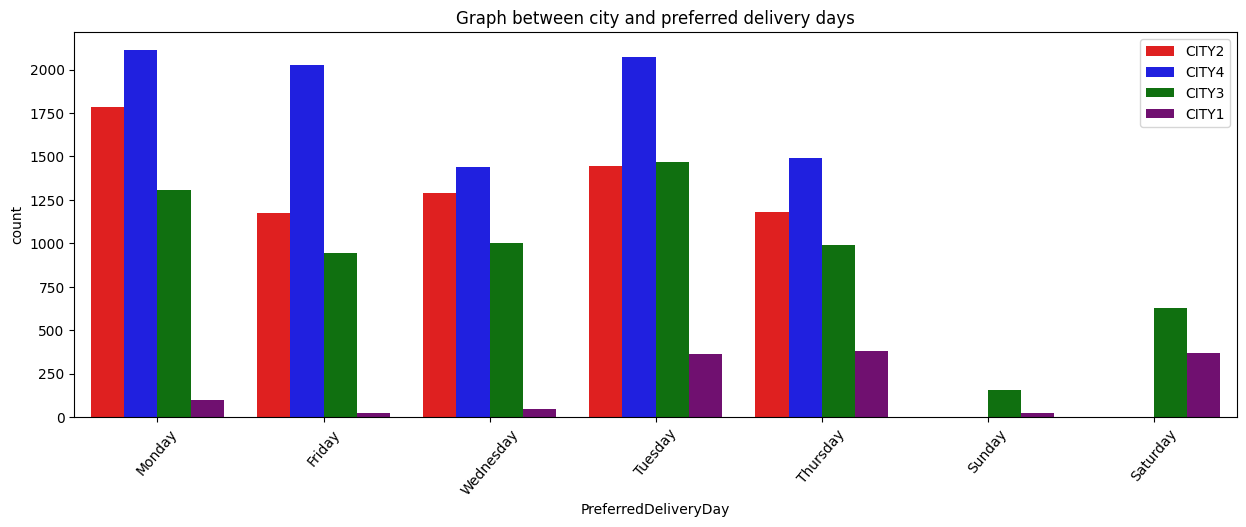

In [ ]:
# Observing the PreferredDeliveryDay.
from collections import Counter
a = Counter(df['PreferredDeliveryDay'])
print(a)
plt.figure(figsize=(15,5))
plt.xticks(fontsize=10, rotation=50)
plt.title('Graph between city and preferred delivery days')
sns.countplot(x ='PreferredDeliveryDay', data=df, hue='City', palette=['red','blue','green','purple'])
plt.legend(loc='upper right')
plt.show()
print('INSIGHTS')
print('Here by observing the preferreddeliverydays,Customers who are buying online are mostly maybe not workingprofessional.Maybe mostly ordereditems are householditems')

In [ ]:
df= pd.get_dummies(df, columns=['City'],drop_first=True)
df.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,RetentionPotential,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4
0,C16368,0,0,0,Monday,1,29,29,1,High,15,1,0.000000,0,2012,9,28,1,0,0
1,C20345,1,1,1,Friday,1,95,88,10,Low,15614,186,5.505376,1024,2010,12,19,1,0,0
2,C17683,0,0,0,Wednesday,1,0,0,0,Medium,443,13,16.692308,217,2010,10,3,1,0,0
3,C18647,0,0,0,Monday,1,30,27,4,Low,748,7,113.000000,791,2010,11,27,0,0,1
4,C36692,1,1,0,Friday,1,64,18,10,Low,2350,34,24.941176,848,2009,12,4,1,0,0


In [ ]:
#applying label encoding technique 
from sklearn.preprocessing import LabelEncoder
# use LabelEncoder to convert 'retention_potential' and PreferredDeliveryDay to numeric values
le = LabelEncoder()
df['RetentionPotential_num'] = le.fit_transform(df['RetentionPotential'])
df['PreferredDeliveryDay_num'] = le.fit_transform(df['PreferredDeliveryDay'])


In [ ]:
df.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,RetentionPotential,...,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4,RetentionPotential_num,PreferredDeliveryDay_num
0,C16368,0,0,0,Monday,1,29,29,1,High,...,0.000000,0,2012,9,28,1,0,0,0,1
1,C20345,1,1,1,Friday,1,95,88,10,Low,...,5.505376,1024,2010,12,19,1,0,0,1,0
2,C17683,0,0,0,Wednesday,1,0,0,0,Medium,...,16.692308,217,2010,10,3,1,0,0,2,6
3,C18647,0,0,0,Monday,1,30,27,4,Low,...,113.000000,791,2010,11,27,0,0,1,1,1
4,C36692,1,1,0,Friday,1,64,18,10,Low,...,24.941176,848,2009,12,4,1,0,0,1,0


In [ ]:
#Droping RetentionPotential and CustomerID because it does not contain any useful information
df=df.drop(['RetentionPotential','PreferredDeliveryDay','CustomerID'],axis=1)
df.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4,RetentionPotential_num,PreferredDeliveryDay_num
0,0,0,0,1,29,29,1,15,1,0.000000,0,2012,9,28,1,0,0,0,1
1,1,1,1,1,95,88,10,15614,186,5.505376,1024,2010,12,19,1,0,0,1,0
2,0,0,0,1,0,0,0,443,13,16.692308,217,2010,10,3,1,0,0,2,6
3,0,0,0,1,30,27,4,748,7,113.000000,791,2010,11,27,0,0,1,1,1
4,1,1,0,1,64,18,10,2350,34,24.941176,848,2009,12,4,1,0,0,1,0


In [ ]:
df.shape

(23820, 19)

# Checking for Outliers, Skewness and Correalation 

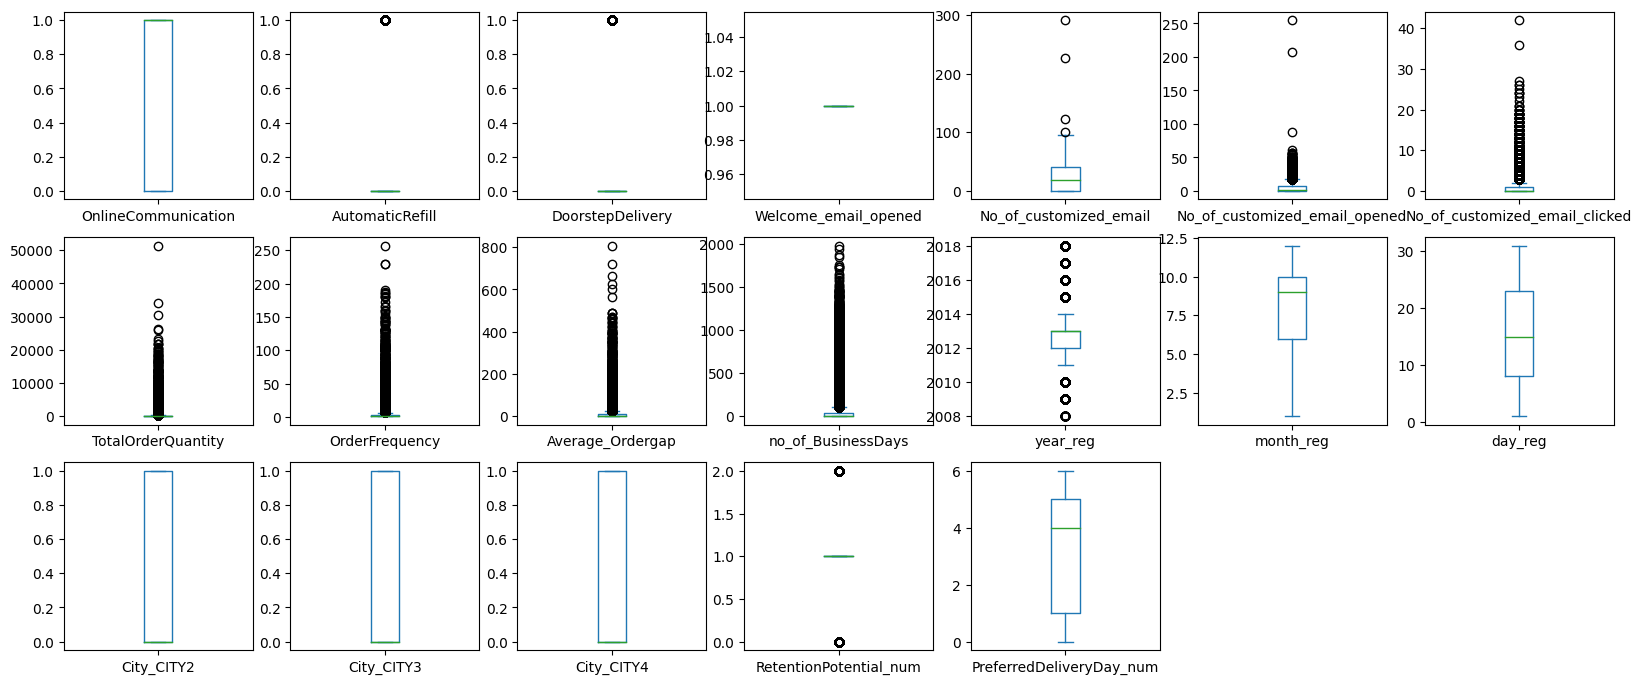

In [ ]:
df.plot(kind='box',subplots=True,layout=(7,7),figsize=(20,20))
plt.show()

Got the more outliers for continuous columns 
 

In [ ]:
#checking the skewness for the columns having outliers
for column in ['Welcome_email_opened','No_of_customized_email_clicked','TotalOrderQuantity','OrderFrequency','no_of_BusinessDays','Average_Ordergap',]:
    skewness = df[column].skew()
    print(f"The skewness of {column} is {skewness:.2f}")

The skewness of Welcome_email_opened is 0.00
The skewness of No_of_customized_email_clicked is 3.54
The skewness of TotalOrderQuantity is 11.27
The skewness of OrderFrequency is 7.61
The skewness of no_of_BusinessDays is 3.39
The skewness of Average_Ordergap is 6.78


In [ ]:
# Applying square root transformation to selected columns
df['No_of_customized_email_clicked'] = np.sqrt(df['No_of_customized_email_clicked'])
df['TotalOrderQuantity'] = np.sqrt(df['TotalOrderQuantity'])
df['OrderFrequency'] = np.sqrt(df['OrderFrequency'])
df['no_of_BusinessDays'] = np.sqrt(df['no_of_BusinessDays'])
df['Average_Ordergap'] = np.sqrt(df['Average_Ordergap'])

In [ ]:
#checking the skewness for the columns having outliers
for column in ['Welcome_email_opened','No_of_customized_email_clicked','TotalOrderQuantity','OrderFrequency','no_of_BusinessDays','Average_Ordergap',]:
    skewness = df[column].skew()
    print(f"The skewness of {column} is {skewness:.2f}")

The skewness of Welcome_email_opened is 0.00
The skewness of No_of_customized_email_clicked is 1.37
The skewness of TotalOrderQuantity is 4.39
The skewness of OrderFrequency is 3.82
The skewness of no_of_BusinessDays is 2.01
The skewness of Average_Ordergap is 2.23


In [ ]:
df.columns

Index(['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'Welcome_email_opened', 'No_of_customized_email',
       'No_of_customized_email_opened', 'No_of_customized_email_clicked',
       'TotalOrderQuantity', 'OrderFrequency', 'Average_Ordergap',
       'no_of_BusinessDays', 'year_reg', 'month_reg', 'day_reg', 'City_CITY2',
       'City_CITY3', 'City_CITY4', 'RetentionPotential_num',
       'PreferredDeliveryDay_num'],
      dtype='object')

***Which features are more correlated to the price?***

In [ ]:
co_df=df.drop(['Welcome_email_opened'],axis=1)

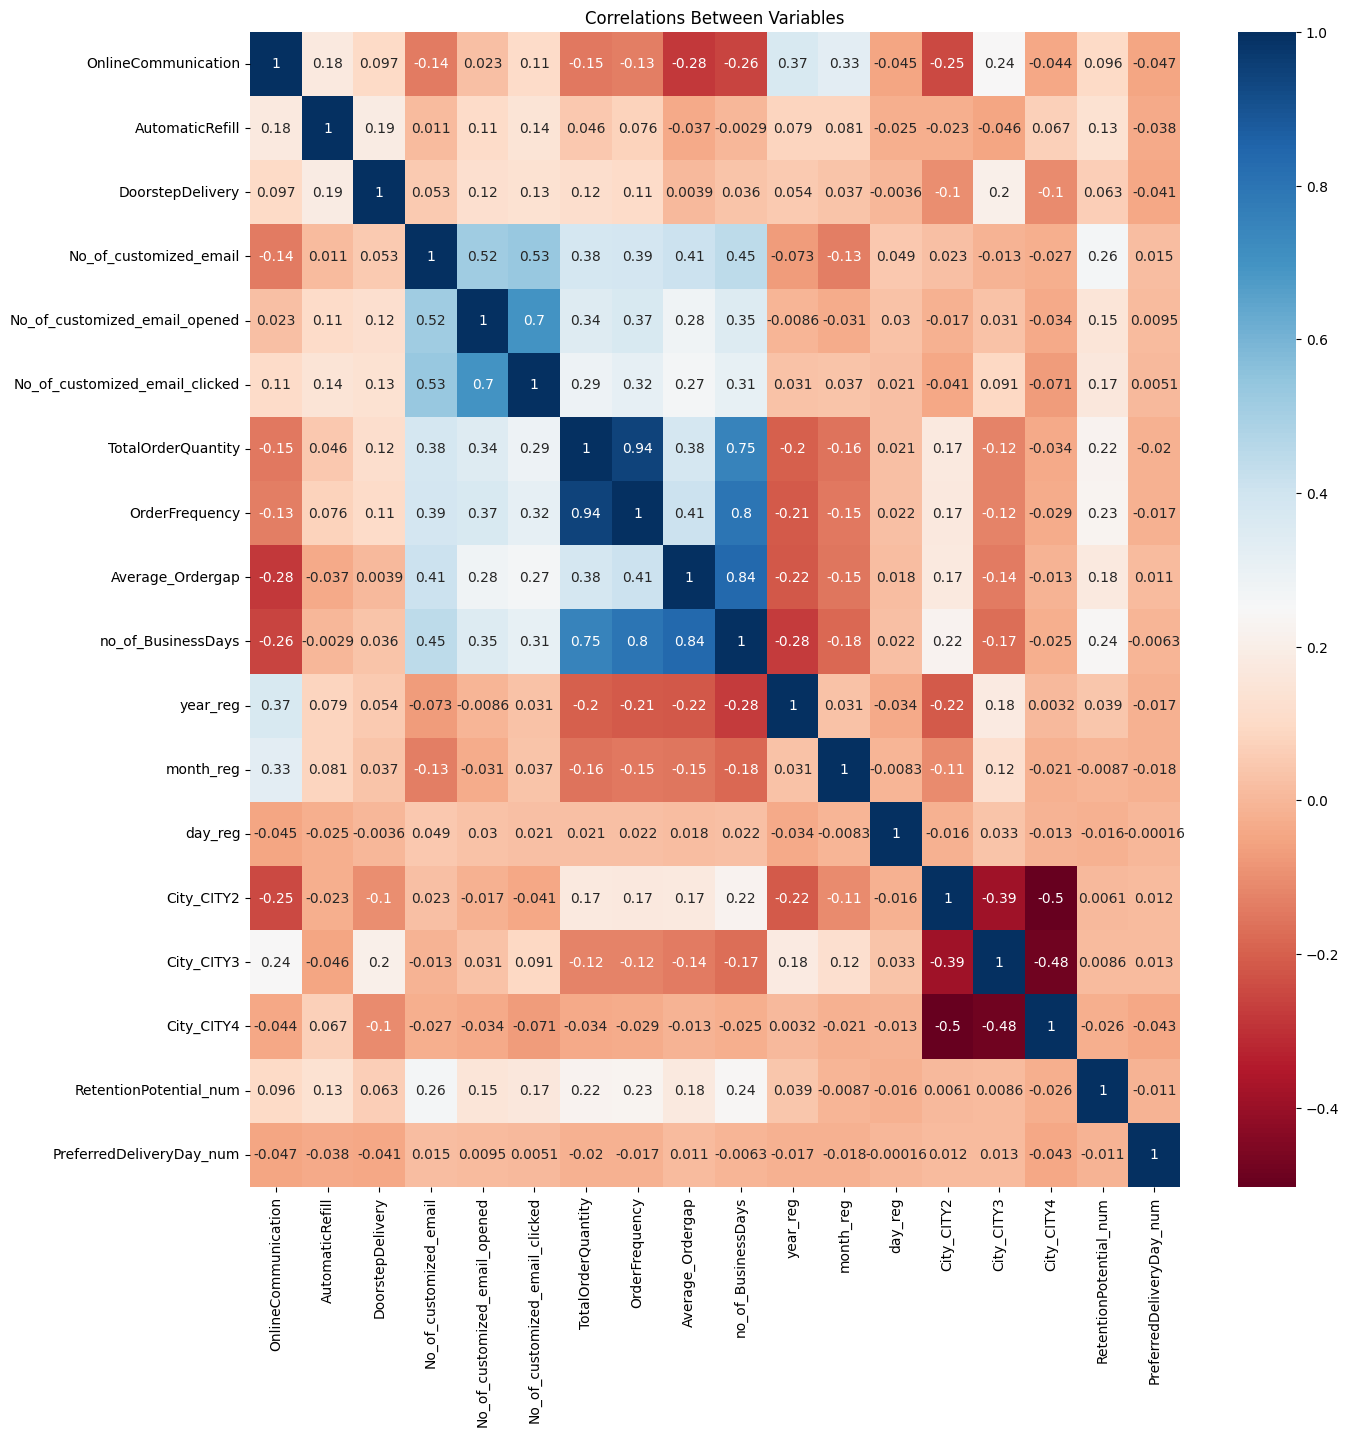

In [ ]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(co_df.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables")
plt.show()

#  Train Test split 

In [ ]:
# importing neccessary libraries
from sklearn.model_selection import train_test_split

# splitting of data
X = df.drop(['RetentionPotential_num'],axis=1)
y = df['RetentionPotential_num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16674, 18)
(7146, 18)
(16674,)
(7146,)


Smote to handle the imbalance

In [ ]:
# Applying smote to handle the class imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_train, y_train)

In [ ]:
# Observing the dimensions of X_Smote and y_smote
X_smote.shape


(40329, 18)

In [ ]:
y_smote.shape

(40329,)

Defining the evaluate_model to print the Confusion_matrix, Recall and Precision.

In [ ]:
# Function to evaluate the model metrics.
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix 
    # Creating  a confusion matrix,which compares the act and pred
    cm =confusion_matrix(act, pred)
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df = pd.DataFrame(cm,index = ['low','high','medium'],columns = ['low','high','medium'])
    #Plotting the confusion matrix
    cm_plot=(plt.figure(figsize=(3,2)),sns.heatmap(cm_df,fmt=".2f", annot=True),plt.title('Confusion Matrix'),plt.ylabel('Actal Values'),plt.xlabel('Predicted Values'),plt.show())
    print("Confusion Matrix \n", cm_plot)
    # Function to evaluate the model metrics.

    from sklearn.metrics import  classification_report
    print( classification_report(act, pred))

# Model building using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier and fit it with train data
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

# Predict the classes of the training and test datasets
train_pred_rf = clf1.predict(X_train)
test_pred_rf = clf1.predict(X_test)

Train


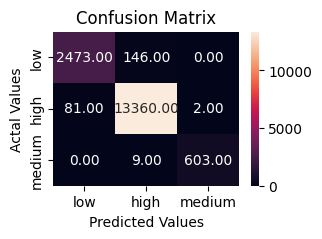

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2619
           1       0.99      0.99      0.99     13443
           2       1.00      0.99      0.99       612

    accuracy                           0.99     16674
   macro avg       0.98      0.97      0.98     16674
weighted avg       0.99      0.99      0.99     16674

Test


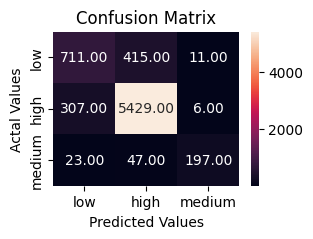

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1137
           1       0.92      0.95      0.93      5742
           2       0.92      0.74      0.82       267

    accuracy                           0.89      7146
   macro avg       0.84      0.77      0.80      7146
weighted avg       0.88      0.89      0.88      7146



In [ ]:
# Evaluate the recall and precision of the RandomForest classifier on the training and test sets  
print("Train")
evaluate_model(y_train, train_pred_rf)
print("Test")
evaluate_model(y_test, test_pred_rf)

Hyperparameter tunning by using the GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Define the model
model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# Print the results
print('Best score:', grid_result.best_score_)
print('Best parameters:', grid_result.best_params_)

# Use the best model to make predictions
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model using recall score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)


Best score: 0.8942663341394688
Best parameters: {'max_depth': 10, 'n_estimators': 50}
Recall: 0.890708088441086


In [ ]:
# Create a RandomForestClassifier and fit the model with the best hyperparameters and train data
best_model = RandomForestClassifier(n_estimators=50, max_depth=10)
best_model.fit(X_train, y_train)

# Predict the classes of the training and test datasets
train_pred_rf1 = best_model.predict(X_train)
test_pred_rf1 = best_model.predict(X_test)


Train


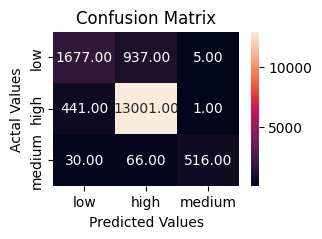

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.78      0.64      0.70      2619
           1       0.93      0.97      0.95     13443
           2       0.99      0.84      0.91       612

    accuracy                           0.91     16674
   macro avg       0.90      0.82      0.85     16674
weighted avg       0.91      0.91      0.91     16674

Test


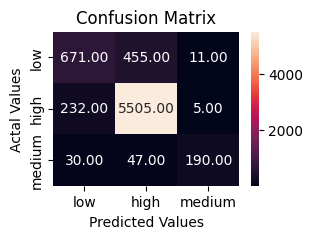

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      1137
           1       0.92      0.96      0.94      5742
           2       0.92      0.71      0.80       267

    accuracy                           0.89      7146
   macro avg       0.85      0.75      0.80      7146
weighted avg       0.89      0.89      0.89      7146



In [ ]:
# Evaluate the recall and precision of the RandomForest classifier on the training and test sets 
print("Train")
evaluate_model(y_train, train_pred_rf1)
print("Test")
evaluate_model(y_test, test_pred_rf1)

model building by using the smote 

In [ ]:
# Model Building using RandomForestClassifier after applying the smote
smote_rf = RandomForestClassifier(n_estimators=50, max_depth=10)
smote_rf.fit(X_smote, y_smote)

# Predict the classes of the training and test datasets
train_pred_smote_rf = smote_rf.predict(X_smote)
test_pred_smote_rf = smote_rf.predict(X_test)

Train


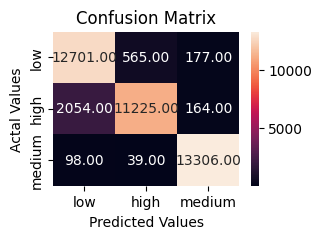

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     13443
           1       0.95      0.84      0.89     13443
           2       0.98      0.99      0.98     13443

    accuracy                           0.92     40329
   macro avg       0.93      0.92      0.92     40329
weighted avg       0.93      0.92      0.92     40329

Test


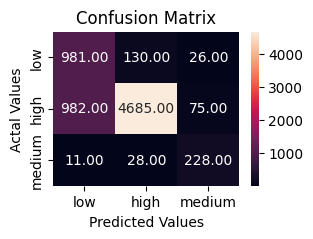

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.50      0.86      0.63      1137
           1       0.97      0.82      0.89      5742
           2       0.69      0.85      0.77       267

    accuracy                           0.82      7146
   macro avg       0.72      0.84      0.76      7146
weighted avg       0.88      0.82      0.84      7146



In [ ]:
# Evaluate the recall and precision of the RandomForest classifier on the training and test sets 
print("Train")
evaluate_model(y_smote, train_pred_smote_rf)
print("Test")
evaluate_model(y_test, test_pred_smote_rf)

# Model building by using KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier and fit it with train data
knn_classifier = KNeighborsClassifier(n_neighbors=int(5))
knn_classifier.fit(X_train, y_train)

# Predict the classes of the training and test datasets
train_pred_knn = knn_classifier.predict(X_train)
test_pred_knn = knn_classifier.predict(X_test)

Train


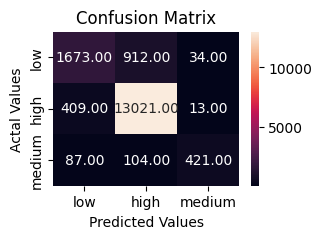

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      2619
           1       0.93      0.97      0.95     13443
           2       0.90      0.69      0.78       612

    accuracy                           0.91     16674
   macro avg       0.87      0.77      0.81     16674
weighted avg       0.90      0.91      0.90     16674

Test


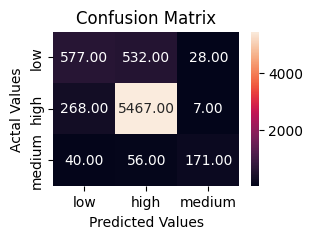

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1137
           1       0.90      0.95      0.93      5742
           2       0.83      0.64      0.72       267

    accuracy                           0.87      7146
   macro avg       0.79      0.70      0.74      7146
weighted avg       0.86      0.87      0.86      7146



In [ ]:
# Evaluate the recall and precision of the KNN classifier on the training and test sets 
print("Train")
evaluate_model(y_train, train_pred_knn)
print("Test")
evaluate_model(y_test, test_pred_knn)

Hyperparameter tunning by using Gridsearch

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Perform the grid search
grid = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# Print the results
print('Best score:', grid_result.best_score_)
print('Best parameters:', grid_result.best_params_)

# Use the best model to make predictions
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model using recall score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

Best score: 0.8723758936368649
Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Recall: 0.8716764623565632


In [ ]:
# Create a KNN classifier and fit it with train data
best_model_knn = KNeighborsClassifier(n_neighbors=int(7), weights = 'uniform')
best_model_knn.fit(X_train, y_train)   

# Predict the classes of the training and test datasets
train_pred_knn1 = best_model_knn.predict(X_train)
test_pred_knn1 = best_model_knn.predict(X_test)

Train


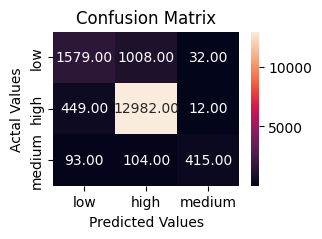

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.74      0.60      0.67      2619
           1       0.92      0.97      0.94     13443
           2       0.90      0.68      0.77       612

    accuracy                           0.90     16674
   macro avg       0.86      0.75      0.79     16674
weighted avg       0.89      0.90      0.89     16674

Test


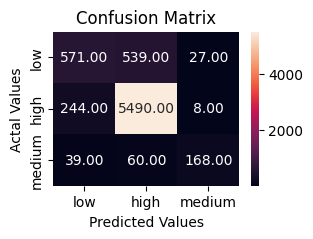

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.67      0.50      0.57      1137
           1       0.90      0.96      0.93      5742
           2       0.83      0.63      0.71       267

    accuracy                           0.87      7146
   macro avg       0.80      0.70      0.74      7146
weighted avg       0.86      0.87      0.86      7146



In [ ]:
# Evaluate the recall and precision of the KNN classifier on the training and test sets 
print("Train")
evaluate_model(y_train, train_pred_knn1)
print("Test")
evaluate_model(y_test, test_pred_knn1)

Model buildibg by using  smote

In [ ]:
# Model Building using KNeighborsClassifier after applying the smote
smote_knn = KNeighborsClassifier(n_neighbors=int(7), weights = 'uniform')
smote_knn.fit(X_smote, y_smote)

# Predict the classes of the training and test datasets
train_pred_smote_knn = smote_knn.predict(X_smote)
test_pred_smote_knn = smote_knn.predict(X_test)

Train


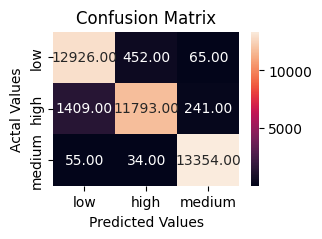

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     13443
           1       0.96      0.88      0.92     13443
           2       0.98      0.99      0.99     13443

    accuracy                           0.94     40329
   macro avg       0.95      0.94      0.94     40329
weighted avg       0.95      0.94      0.94     40329

Test


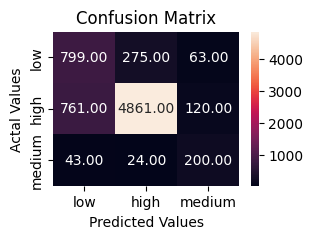

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.50      0.70      0.58      1137
           1       0.94      0.85      0.89      5742
           2       0.52      0.75      0.62       267

    accuracy                           0.82      7146
   macro avg       0.65      0.77      0.70      7146
weighted avg       0.86      0.82      0.83      7146



In [ ]:
# Evaluate the recall and precision of the KNeighborsClassifier on the training and test sets 
print("Train")
evaluate_model(y_smote, train_pred_smote_knn)
print("Test")
evaluate_model(y_test, test_pred_smote_knn)

# Model building by using GradientBoostingClassifier.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a KNN classifier and fit it with train data
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

# Predict the classes of the training and test datasets
train_pred_gbc = gbc.predict(X_train)
test_pred_gbc = gbc.predict(X_test)

Train


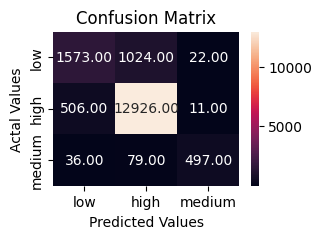

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.74      0.60      0.66      2619
           1       0.92      0.96      0.94     13443
           2       0.94      0.81      0.87       612

    accuracy                           0.90     16674
   macro avg       0.87      0.79      0.83     16674
weighted avg       0.89      0.90      0.90     16674

Test


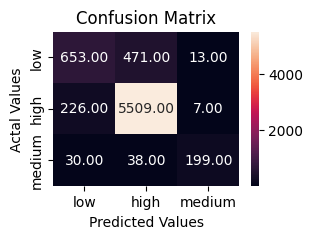

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.72      0.57      0.64      1137
           1       0.92      0.96      0.94      5742
           2       0.91      0.75      0.82       267

    accuracy                           0.89      7146
   macro avg       0.85      0.76      0.80      7146
weighted avg       0.88      0.89      0.88      7146



In [ ]:
# Evaluate the recall and precision of the GradientBoostingClassifier on the training and test sets 
print("Train")
evaluate_model(y_train, train_pred_gbc)
print("Test")
evaluate_model(y_test, test_pred_gbc)

Model building by using smote

In [ ]:
# Model Building using GradientboostingClassifier after applying the smote
smote_gbc = GradientBoostingClassifier()
smote_gbc.fit(X_smote, y_smote)

# Predict the classes of the training and test datasets
train_pred_smote_gbc = smote_gbc.predict(X_smote)
test_pred_smote_gbc = smote_gbc.predict(X_test)

Train


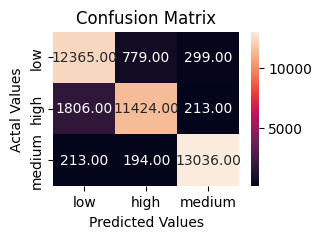

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     13443
           1       0.92      0.85      0.88     13443
           2       0.96      0.97      0.97     13443

    accuracy                           0.91     40329
   macro avg       0.91      0.91      0.91     40329
weighted avg       0.91      0.91      0.91     40329

Test


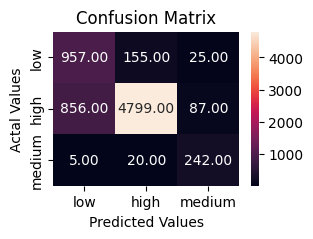

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.53      0.84      0.65      1137
           1       0.96      0.84      0.90      5742
           2       0.68      0.91      0.78       267

    accuracy                           0.84      7146
   macro avg       0.72      0.86      0.77      7146
weighted avg       0.88      0.84      0.85      7146



In [ ]:
# Evaluate the recall and precision of the GradientBoostingClassifier on the training and test sets 
print("Train")
evaluate_model(y_smote, train_pred_smote_gbc)
print("Test")
evaluate_model(y_test, test_pred_smote_gbc)

# Model building using AdaBoostClassifier

---



In [ ]:
# Model Building using AdaBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

# Predict the classes of the training and test datasets
train_pred_ada = ada.predict(X_train)
test_pred_ada = ada.predict(X_test)

Train


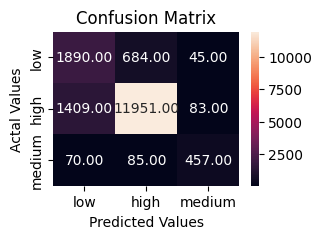

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.56      0.72      0.63      2619
           1       0.94      0.89      0.91     13443
           2       0.78      0.75      0.76       612

    accuracy                           0.86     16674
   macro avg       0.76      0.79      0.77     16674
weighted avg       0.87      0.86      0.86     16674

Test


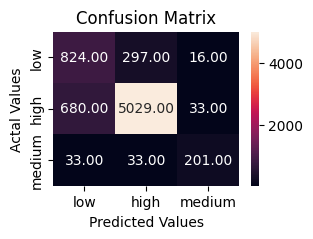

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.54      0.72      0.62      1137
           1       0.94      0.88      0.91      5742
           2       0.80      0.75      0.78       267

    accuracy                           0.85      7146
   macro avg       0.76      0.78      0.77      7146
weighted avg       0.87      0.85      0.86      7146



In [ ]:
# Observing the predictions on train and test. 
print("Train")
evaluate_model(y_train, train_pred_ada)
print("Test")
evaluate_model(y_test, test_pred_ada)

Model building by using the smote


In [ ]:
# Model Building using AdaBoostClassifier after applying the smote
smote_ada = AdaBoostClassifier()
smote_ada.fit(X_smote, y_smote)

# Predict the classes of the training and test datasets
train_pred_smote_ada = smote_ada.predict(X_smote)
test_pred_smote_ada = smote_ada.predict(X_test)



Train


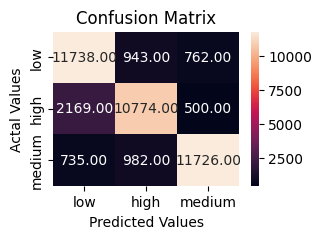

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.80      0.87      0.84     13443
           1       0.85      0.80      0.82     13443
           2       0.90      0.87      0.89     13443

    accuracy                           0.85     40329
   macro avg       0.85      0.85      0.85     40329
weighted avg       0.85      0.85      0.85     40329

Test


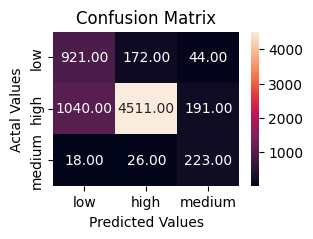

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.47      0.81      0.59      1137
           1       0.96      0.79      0.86      5742
           2       0.49      0.84      0.62       267

    accuracy                           0.79      7146
   macro avg       0.64      0.81      0.69      7146
weighted avg       0.86      0.79      0.81      7146



In [ ]:
# Evaluate the recall and precision of the AdaBoostClassifier on the training and test sets 
print("Train")
evaluate_model(y_smote, train_pred_smote_ada)
print("Test")
evaluate_model(y_test, test_pred_smote_ada)

# Model building by using NeuralNetworks

### Normalizing / scaling the data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the training data
train_scaled = scaler.fit_transform(X_train)

In [ ]:
train_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.66666667],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.83333333],
       ...,
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.83333333],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.83333333]])

In [ ]:
X=X_train
Y=y_train

In [ ]:
X.shape[1]

18

In [ ]:
Y.shape[0]

16674

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.CategoricalCrossentropy()
metrics = [keras.metrics.Accuracy()]



In [ ]:

model=Sequential()
model.add(Dense(18,activation='softmax',input_dim=18))
model.add(Dense(18,activation='softmax'))
model.add(Dense(1,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 18)                342       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)


Epoch 1/50
417/417 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 2.2490e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0018
Epoch 2/50
417/417 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 2.2490e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0018
Epoch 3/50
417/417 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.4994e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0018
Epoch 4/50
417/417 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 7.4968e-05 - val_loss: 0.0000e+00 - val_accuracy: 0.0018
Epoch 5/50
417/417 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 2.2490e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0018
Epoch 6/50
417/417 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.4994e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0018
Epoch 7/50
417/417 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
NN_train_pred = np.round(model.predict(X_train)).flatten()
NN_test_pred = np.round(model.predict(X_test)).flatten()

224/224 [==============================] - 0s 2ms/step


Train


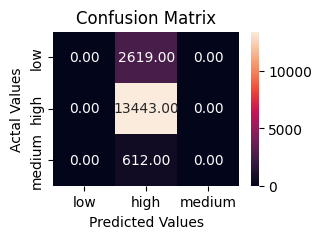

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2619
           1       0.81      1.00      0.89     13443
           2       0.00      0.00      0.00       612

    accuracy                           0.81     16674
   macro avg       0.27      0.33      0.30     16674
weighted avg       0.65      0.81      0.72     16674

Test


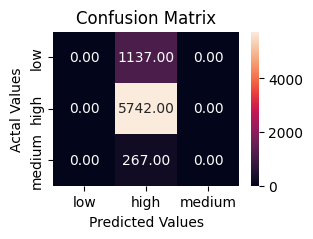

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1137
           1       0.80      1.00      0.89      5742
           2       0.00      0.00      0.00       267

    accuracy                           0.80      7146
   macro avg       0.27      0.33      0.30      7146
weighted avg       0.65      0.80      0.72      7146



In [ ]:
# Observing the predictions on train and test. 
print("Train")
evaluate_model(y_train, NN_train_pred)
print("Test")
evaluate_model(y_test, NN_test_pred)

# Loading the Test data

In [ ]:
test=pd.read_excel("/content/drive/MyDrive/Hackathon/Test.xlsx")
test_transaction=pd.read_excel("/content/drive/MyDrive/Hackathon/transactionsdata_Test.xlsx")
test_customer=pd.read_excel("/content/drive/MyDrive/Hackathon/Customerdata_Test.xlsx")
test_email=pd.read_excel("/content/drive/MyDrive/Hackathon/Emaildata_Test.xlsx")
print(test.shape)
print(test_transaction.shape)
print(test_customer.shape)
print(test_email.shape)

(5955, 1)
(26768, 4)
(5955, 7)
(129074, 6)


# Test

In [ ]:
test.head()

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136


In [ ]:
test.isnull().sum()

CustomerID    0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5955 non-null   object
dtypes: object(1)
memory usage: 46.6+ KB


In [ ]:
test.nunique()

CustomerID    5955
dtype: int64

In [ ]:
test.describe()

,CustomerID
count,5955
unique,5955
top,C12121
freq,1


# Test_customer

In [ ]:
test_customer.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [ ]:
test_customer.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
test_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5955 non-null   object        
 1   City                  5955 non-null   object        
 2   DateOfRegistration    5955 non-null   datetime64[ns]
 3   OnlineCommunication   5955 non-null   int64         
 4   AutomaticRefill       5955 non-null   int64         
 5   DoorstepDelivery      5955 non-null   int64         
 6   PreferredDeliveryDay  5955 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 325.8+ KB


In [ ]:
test_customer.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [ ]:
test_customer.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,5955.000000,5955.000000,5955.000000
mean,0.659278,0.095046,0.038959
std,0.473992,0.293303,0.193513
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


# Test_Transaction

In [ ]:
test_transaction.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [ ]:
test_transaction.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

In [ ]:
test_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     26768 non-null  object
 1   DateOfOrder    26768 non-null  object
 2   timestamp      26768 non-null  object
 3   OrderQuantity  26768 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 836.6+ KB


In [ ]:
test_transaction.nunique()

CustomerID        5955
DateOfOrder       2771
timestamp        15326
OrderQuantity      372
dtype: int64

In [ ]:
test_transaction.describe()

,OrderQuantity
count,26768.000000
mean,84.407763
std,50.794616
min,1.000000
25%,51.000000
50%,73.000000
75%,102.000000
max,501.000000


In [ ]:
test_transaction=test_transaction.drop(["timestamp"],axis=1)

In [ ]:
# Convert dateoforder to datetime format
test_transaction['DateOfOrder'] = pd.to_datetime(test_transaction['DateOfOrder'])
test_transaction =test_transaction.sort_values(['CustomerID', 'DateOfOrder'])
test_transaction.head()

,CustomerID,DateOfOrder,OrderQuantity
26576,C12121,2017-12-14,52
19363,C12132,2013-10-20,40
17770,C12134,2013-09-18,40
26401,C12135,2018-01-10,41
18455,C12136,2013-10-19,79


In [ ]:
# Group the test_transactions by 'CustomerID' and extract the test_first and test_last order dates for each group
test_first_order = test_transaction.groupby('CustomerID')['DateOfOrder'].min().reset_index()
test_last_order = test_transaction.groupby('CustomerID')['DateOfOrder'].max().reset_index()

# Merge the test_first_order and test_last_order DataFrames
test_transaction_1 = pd.merge(test_first_order, test_last_order, on='CustomerID')

# Rename the columns
test_transaction_1.columns = ['CustomerID', 'firstOrder', 'lastOrder']

# Print the result
test_transaction_1

,CustomerID,firstOrder,lastOrder
0,C12121,2017-12-14,2017-12-14
1,C12132,2013-10-20,2013-10-20
2,C12134,2013-09-18,2013-09-18
3,C12135,2018-01-10,2018-01-10
4,C12136,2013-10-19,2013-10-19
...,...,...,...
5950,C42153,2012-10-18,2012-11-16
5951,C42155,2013-09-14,2013-09-14
5952,C42157,2013-09-30,2013-09-30
5953,C42167,2016-10-28,2017-11-06


In [ ]:
# Calculate the differences between test_first order and test_last order 

test_transaction_1['no_of_BusinessDays'] = (test_transaction_1['lastOrder'] - test_transaction_1['firstOrder']).dt.days.abs()
test_transaction_1

,CustomerID,firstOrder,lastOrder,no_of_BusinessDays
0,C12121,2017-12-14,2017-12-14,0
1,C12132,2013-10-20,2013-10-20,0
2,C12134,2013-09-18,2013-09-18,0
3,C12135,2018-01-10,2018-01-10,0
4,C12136,2013-10-19,2013-10-19,0
...,...,...,...,...
5950,C42153,2012-10-18,2012-11-16,29
5951,C42155,2013-09-14,2013-09-14,0
5952,C42157,2013-09-30,2013-09-30,0
5953,C42167,2016-10-28,2017-11-06,374


In [ ]:
test_transaction_1=test_transaction_1.drop(['firstOrder','lastOrder'],axis=1)
test_transaction_1

,CustomerID,no_of_BusinessDays
0,C12121,0
1,C12132,0
2,C12134,0
3,C12135,0
4,C12136,0
...,...,...
5950,C42153,29
5951,C42155,0
5952,C42157,0
5953,C42167,374


In [ ]:
test_transaction['Ordergap'] = test_transaction.groupby('CustomerID')['DateOfOrder'].diff().fillna(pd.Timedelta(seconds=0))
test_transaction.head()  

,CustomerID,DateOfOrder,OrderQuantity,Ordergap
26576,C12121,2017-12-14,52,0 days
19363,C12132,2013-10-20,40,0 days
17770,C12134,2013-09-18,40,0 days
26401,C12135,2018-01-10,41,0 days
18455,C12136,2013-10-19,79,0 days


In [ ]:
test_transaction['Ordergap'] = (test_transaction['Ordergap'].dt.total_seconds() / 86400).astype(int)
test_transaction.head()

,CustomerID,DateOfOrder,OrderQuantity,Ordergap
26576,C12121,2017-12-14,52,0
19363,C12132,2013-10-20,40,0
17770,C12134,2013-09-18,40,0
26401,C12135,2018-01-10,41,0
18455,C12136,2013-10-19,79,0


In [ ]:
test_avg_ordergap_df = test_transaction.groupby('CustomerID')['Ordergap'].mean().reset_index()
test_avg_ordergap_df.columns = ['CustomerID', 'Average_Ordergap']
test_avg_ordergap_df.head(10)

,CustomerID,Average_Ordergap
0,C12121,0.0
1,C12132,0.0
2,C12134,0.0
3,C12135,0.0
4,C12136,0.0
5,C12139,0.0
6,C12142,0.0
7,C12146,0.0
8,C12148,0.0
9,C12157,9.0


In [ ]:
# merging test_transaction_1 and test_avg_ordergap_df based on CustomerID-
test_merge_transaction=test_avg_ordergap_df.merge(test_transaction_1,on='CustomerID', how='inner') 
test_merge_transaction.head()

,CustomerID,Average_Ordergap,no_of_BusinessDays
0,C12121,0.0,0
1,C12132,0.0,0
2,C12134,0.0,0
3,C12135,0.0,0
4,C12136,0.0,0


In [ ]:
# group by CustomerID and aggregate the order quantity by sum and count
test_grouped_df = test_transaction.groupby('CustomerID')['OrderQuantity'].agg(['sum', 'count']).reset_index()

# rename the columns
test_grouped_df = test_grouped_df.rename(columns={'sum': 'TotalOrderQuantity', 'count': 'OrderFrequency'})

# print the new DataFrame
test_grouped_df.head()

,CustomerID,TotalOrderQuantity,OrderFrequency
0,C12121,52,1
1,C12132,40,1
2,C12134,40,1
3,C12135,41,1
4,C12136,79,1


In [ ]:
# merging test_merge_transaction and test_grouped_df based on CustomerID
test_transaction_df=test_grouped_df.merge(test_merge_transaction,on='CustomerID', how='inner') 
test_transaction_df.head()

,CustomerID,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
0,C12121,52,1,0.0,0
1,C12132,40,1,0.0,0
2,C12134,40,1,0.0,0
3,C12135,41,1,0.0,0
4,C12136,79,1,0.0,0


In [ ]:
test_transaction_df.shape

(5955, 5)

In [ ]:
test_transaction_df.isnull().sum()

CustomerID            0
TotalOrderQuantity    0
OrderFrequency        0
Average_Ordergap      0
no_of_BusinessDays    0
dtype: int64

In [ ]:
test_transaction_df.nunique()

CustomerID            5955
TotalOrderQuantity    1030
OrderFrequency         106
Average_Ordergap      1038
no_of_BusinessDays     661
dtype: int64

In [ ]:
test_transaction_df.describe()

,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
count,5955.000000,5955.000000,5955.000000,5955.000000
mean,379.416793,4.495046,11.991228,86.243157
std,1665.587177,12.791030,34.439839,221.391688
min,1.000000,1.000000,0.000000,0.000000
25%,41.000000,1.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,0.000000
75%,162.000000,3.000000,9.571429,37.000000
max,57960.000000,185.000000,601.500000,1930.000000


# Test_Email Data

In [ ]:
test_email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [ ]:
test_email.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [ ]:
test_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129074 entries, 0 to 129073
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   129074 non-null  object
 1   DateOfemail  129074 non-null  object
 2   EmailType    129074 non-null  object
 3   timestamp    129074 non-null  object
 4   MailOpened   129074 non-null  object
 5   MailClicked  129074 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


In [ ]:
test_email.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [ ]:
test_email.describe()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,129074,129074,129074,129074,129074,129074
unique,5955,3149,2,14366,2,3
top,C14650,2013-10-02,CustomizedEmail,11:28:48,no,no
freq,280,545,123119,24,92296,116201


In [ ]:
test_email_1=test_email.drop(['DateOfemail','timestamp'],axis=1)
test_email_1

,CustomerID,EmailType,MailOpened,MailClicked
0,C17838,WelcomeEmail,yes,NotApplicable
1,C12403,WelcomeEmail,yes,NotApplicable
2,C19041,WelcomeEmail,yes,NotApplicable
3,C24069,WelcomeEmail,yes,NotApplicable
4,C26718,WelcomeEmail,yes,NotApplicable
...,...,...,...,...
129069,C30169,CustomizedEmail,no,no
129070,C30169,CustomizedEmail,no,no
129071,C30169,CustomizedEmail,yes,yes
129072,C30169,CustomizedEmail,yes,no


In [ ]:
test_email_1['EmailType'].value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [ ]:
test_email_1.nunique()

CustomerID     5955
EmailType         2
MailOpened        2
MailClicked       3
dtype: int64

In [ ]:
# Define the function to create the new column[welcome email opened or not]
def welcome_email_opened(row):
    if row['EmailType'] == 'WelcomeEmail' and row['MailOpened'] == 'yes':
        return 1  #yes=1
    else:
        return 0  #no=0

In [ ]:
# Calculate the welcome email opened or not column
test_email_2 = pd.DataFrame()
test_email_2['CustomerID'] = test_email_1['CustomerID'].unique()
test_email_2['Welcome_email_opened'] = test_email_1.apply(welcome_email_opened, axis=1)

# Display the email_2 DataFrame
test_email_2

,CustomerID,Welcome_email_opened
0,C17838,1
1,C12403,1
2,C19041,1
3,C24069,1
4,C26718,1
...,...,...
5950,C32947,1
5951,C28951,1
5952,C38741,1
5953,C20407,1


In [ ]:
## create a new DataFrame called `email_3` by grouping rows of `email_1` by `CustomerID`
test_email_3 = test_email_1.groupby('CustomerID').agg(
    # count the number of times the value in `EmailType` is `'CustomizedEmail'` within each group
    No_of_customized_email=('EmailType', lambda x: (x == 'CustomizedEmail').sum()),
   # count the number of times the values in `MailOpened` are `'yes'` when the corresponding value in `EmailType` is `'CustomizedEmail'`
    No_of_customized_email_opened=('MailOpened', lambda x: ((test_email_1.loc[x.index, 'EmailType'] == 'CustomizedEmail') & (x == 'yes')).sum()),
   # count the number of times the values in `MailClicked` are `'yes'` when the corresponding value in `EmailType` is `'CustomizedEmail'` 
    No_of_customized_email_clicked=('MailClicked', lambda x: ((test_email_1.loc[x.index, 'EmailType'] == 'CustomizedEmail') & (x == 'yes')).sum())
)


In [ ]:
# reset the index to make `CustomerID` a regular column
test_email_3=test_email_3.reset_index()
# Display the new DataFrame
test_email_3

,CustomerID,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked
0,C12121,24,8,3
1,C12132,0,0,0
2,C12134,0,0,0
3,C12135,29,8,5
4,C12136,41,3,1
...,...,...,...,...
5950,C42153,10,2,1
5951,C42155,0,0,0
5952,C42157,0,0,0
5953,C42167,49,3,1


In [ ]:
#merging email_2 and email_3 based on CustomerID
test_email_df= pd.merge(test_email_2, test_email_3, on='CustomerID')
test_email_df

,CustomerID,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked
0,C17838,1,0,0,0
1,C12403,1,46,37,7
2,C19041,1,60,26,4
3,C24069,1,45,0,0
4,C26718,1,13,8,2
...,...,...,...,...,...
5950,C32947,1,0,0,0
5951,C28951,1,0,0,0
5952,C38741,1,0,0,0
5953,C20407,1,0,0,0


In [ ]:
test_email_df.isnull().sum()

CustomerID                        0
Welcome_email_opened              0
No_of_customized_email            0
No_of_customized_email_opened     0
No_of_customized_email_clicked    0
dtype: int64

In [ ]:
test_email_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CustomerID                      5955 non-null   object
 1   Welcome_email_opened            5955 non-null   int64 
 2   No_of_customized_email          5955 non-null   int64 
 3   No_of_customized_email_opened   5955 non-null   int64 
 4   No_of_customized_email_clicked  5955 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 279.1+ KB


In [ ]:
test_email_df.nunique()

CustomerID                        5955
Welcome_email_opened                 1
No_of_customized_email              76
No_of_customized_email_opened       52
No_of_customized_email_clicked      23
dtype: int64

In [ ]:
test_email_df.describe()

,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked
count,5955.0,5955.000000,5955.000000,5955.000000
mean,1.0,20.674895,5.175987,1.161713
std,0.0,20.451572,9.315447,2.795014
min,1.0,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000
50%,1.0,19.000000,1.000000,0.000000
75%,1.0,41.000000,7.000000,1.000000
max,1.0,279.000000,271.000000,119.000000


# Merging the files by using the joins

In [ ]:
# merging test_customer and test_email_df based on CustomerID
test_df_1=test_customer.merge(test_email_df,on='CustomerID', how='inner') 
test_df_1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,1,0,0,0
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,1,46,37,7
2,C19041,CITY4,2011-01-24,0,1,0,Friday,1,60,26,4
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,1,45,0,0
4,C26718,CITY2,2010-10-02,1,0,0,Monday,1,13,8,2


In [ ]:
test_df_1.shape

(5955, 11)

In [ ]:
test_df_1.isnull().sum()

CustomerID                        0
City                              0
DateOfRegistration                0
OnlineCommunication               0
AutomaticRefill                   0
DoorstepDelivery                  0
PreferredDeliveryDay              0
Welcome_email_opened              0
No_of_customized_email            0
No_of_customized_email_opened     0
No_of_customized_email_clicked    0
dtype: int64

In [ ]:
# merging test and test_transaction_df based on CustomerID
test_df_2=test.merge(test_transaction_df,on='CustomerID', how='inner') 
test_df_2.head()

,CustomerID,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
0,C12121,52,1,0.0,0
1,C12132,40,1,0.0,0
2,C12134,40,1,0.0,0
3,C12135,41,1,0.0,0
4,C12136,79,1,0.0,0


In [ ]:
test_df_2.shape

(5955, 5)

In [ ]:
test_df_2.isnull().sum()

CustomerID            0
TotalOrderQuantity    0
OrderFrequency        0
Average_Ordergap      0
no_of_BusinessDays    0
dtype: int64

In [ ]:
# merging test_df_1 and test_df_2 based on CustomerID
test_df=test_df_1.merge(test_df_2,on='CustomerID', how='inner') 
test_df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,1,0,0,0,55,1,0.000000,0
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,1,46,37,7,29537,168,7.083333,1190
2,C19041,CITY4,2011-01-24,0,1,0,Friday,1,60,26,4,14321,122,8.000000,976
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,1,45,0,0,47,1,0.000000,0
4,C26718,CITY2,2010-10-02,1,0,0,Monday,1,13,8,2,20238,129,8.395349,1083


# Preprocessing the df

In [ ]:
test_df.shape

(5955, 15)

In [ ]:
test_df.isnull().sum()

CustomerID                        0
City                              0
DateOfRegistration                0
OnlineCommunication               0
AutomaticRefill                   0
DoorstepDelivery                  0
PreferredDeliveryDay              0
Welcome_email_opened              0
No_of_customized_email            0
No_of_customized_email_opened     0
No_of_customized_email_clicked    0
TotalOrderQuantity                0
OrderFrequency                    0
Average_Ordergap                  0
no_of_BusinessDays                0
dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CustomerID                      5955 non-null   object        
 1   City                            5955 non-null   object        
 2   DateOfRegistration              5955 non-null   datetime64[ns]
 3   OnlineCommunication             5955 non-null   int64         
 4   AutomaticRefill                 5955 non-null   int64         
 5   DoorstepDelivery                5955 non-null   int64         
 6   PreferredDeliveryDay            5955 non-null   object        
 7   Welcome_email_opened            5955 non-null   int64         
 8   No_of_customized_email          5955 non-null   int64         
 9   No_of_customized_email_opened   5955 non-null   int64         
 10  No_of_customized_email_clicked  5955 non-null   int64         
 11  Tota

In [ ]:
test_df.nunique()

CustomerID                        5955
City                                 4
DateOfRegistration                1631
OnlineCommunication                  2
AutomaticRefill                      2
DoorstepDelivery                     2
PreferredDeliveryDay                 7
Welcome_email_opened                 1
No_of_customized_email              76
No_of_customized_email_opened       52
No_of_customized_email_clicked      23
TotalOrderQuantity                1030
OrderFrequency                     106
Average_Ordergap                  1038
no_of_BusinessDays                 661
dtype: int64

In [ ]:
test_df.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays
count,5955.000000,5955.000000,5955.000000,5955.0,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000
mean,0.659278,0.095046,0.038959,1.0,20.674895,5.175987,1.161713,379.416793,4.495046,11.991228,86.243157
std,0.473992,0.293303,0.193513,0.0,20.451572,9.315447,2.795014,1665.587177,12.791030,34.439839,221.391688
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,41.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.0,19.000000,1.000000,0.000000,63.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.0,41.000000,7.000000,1.000000,162.000000,3.000000,9.571429,37.000000
max,1.000000,1.000000,1.000000,1.0,279.000000,271.000000,119.000000,57960.000000,185.000000,601.500000,1930.000000


In [ ]:
test_df['DateOfRegistration'] = pd.to_datetime(test_df['DateOfRegistration'],infer_datetime_format=True)# changing data dtype to datatime64
test_df['year_reg'] =test_df['DateOfRegistration'].dt.year
test_df['month_reg']=test_df['DateOfRegistration'].dt.month
test_df['day_reg'] =test_df['DateOfRegistration'].dt.day

In [ ]:
test_df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,1,0,0,0,55,1,0.000000,0,2010,10,22
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,1,46,37,7,29537,168,7.083333,1190,2008,11,17
2,C19041,CITY4,2011-01-24,0,1,0,Friday,1,60,26,4,14321,122,8.000000,976,2011,1,24
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday,1,45,0,0,47,1,0.000000,0,2010,9,18
4,C26718,CITY2,2010-10-02,1,0,0,Monday,1,13,8,2,20238,129,8.395349,1083,2010,10,2


In [ ]:
test_df=test_df.drop(['DateOfRegistration'],axis=1)

In [ ]:
test_df.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg
0,C17838,CITY4,0,0,0,Thursday,1,0,0,0,55,1,0.000000,0,2010,10,22
1,C12403,CITY2,1,1,0,Wednesday,1,46,37,7,29537,168,7.083333,1190,2008,11,17
2,C19041,CITY4,0,1,0,Friday,1,60,26,4,14321,122,8.000000,976,2011,1,24
3,C24069,CITY2,0,0,0,Wednesday,1,45,0,0,47,1,0.000000,0,2010,9,18
4,C26718,CITY2,1,0,0,Monday,1,13,8,2,20238,129,8.395349,1083,2010,10,2


In [ ]:
test_df.shape

(5955, 17)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      5955 non-null   object 
 1   City                            5955 non-null   object 
 2   OnlineCommunication             5955 non-null   int64  
 3   AutomaticRefill                 5955 non-null   int64  
 4   DoorstepDelivery                5955 non-null   int64  
 5   PreferredDeliveryDay            5955 non-null   object 
 6   Welcome_email_opened            5955 non-null   int64  
 7   No_of_customized_email          5955 non-null   int64  
 8   No_of_customized_email_opened   5955 non-null   int64  
 9   No_of_customized_email_clicked  5955 non-null   int64  
 10  TotalOrderQuantity              5955 non-null   int64  
 11  OrderFrequency                  5955 non-null   int64  
 12  Average_Ordergap                59

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      5955 non-null   object 
 1   City                            5955 non-null   object 
 2   OnlineCommunication             5955 non-null   int64  
 3   AutomaticRefill                 5955 non-null   int64  
 4   DoorstepDelivery                5955 non-null   int64  
 5   PreferredDeliveryDay            5955 non-null   object 
 6   Welcome_email_opened            5955 non-null   int64  
 7   No_of_customized_email          5955 non-null   int64  
 8   No_of_customized_email_opened   5955 non-null   int64  
 9   No_of_customized_email_clicked  5955 non-null   int64  
 10  TotalOrderQuantity              5955 non-null   int64  
 11  OrderFrequency                  5955 non-null   int64  
 12  Average_Ordergap                59

In [ ]:
test_df= pd.get_dummies(test_df, columns=['City'],drop_first=True)
test_df.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4
0,C17838,0,0,0,Thursday,1,0,0,0,55,1,0.000000,0,2010,10,22,0,0,1
1,C12403,1,1,0,Wednesday,1,46,37,7,29537,168,7.083333,1190,2008,11,17,1,0,0
2,C19041,0,1,0,Friday,1,60,26,4,14321,122,8.000000,976,2011,1,24,0,0,1
3,C24069,0,0,0,Wednesday,1,45,0,0,47,1,0.000000,0,2010,9,18,1,0,0
4,C26718,1,0,0,Monday,1,13,8,2,20238,129,8.395349,1083,2010,10,2,1,0,0


In [ ]:
#applying label encoding technique 
from sklearn.preprocessing import LabelEncoder
# use LabelEncoder to convert 'PreferredDeliveryDay' to numeric values
le = LabelEncoder()
test_df['PreferredDeliveryDay_num'] = le.fit_transform(test_df['PreferredDeliveryDay'])

In [ ]:
test_df.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_num
0,C17838,0,0,0,Thursday,1,0,0,0,55,1,0.000000,0,2010,10,22,0,0,1,4
1,C12403,1,1,0,Wednesday,1,46,37,7,29537,168,7.083333,1190,2008,11,17,1,0,0,6
2,C19041,0,1,0,Friday,1,60,26,4,14321,122,8.000000,976,2011,1,24,0,0,1,0
3,C24069,0,0,0,Wednesday,1,45,0,0,47,1,0.000000,0,2010,9,18,1,0,0,6
4,C26718,1,0,0,Monday,1,13,8,2,20238,129,8.395349,1083,2010,10,2,1,0,0,1


In [ ]:
ids=test_df['CustomerID']
ids

0       C17838
1       C12403
2       C19041
3       C24069
4       C26718
         ...  
5950    C32947
5951    C28951
5952    C38741
5953    C20407
5954    C27220
Name: CustomerID, Length: 5955, dtype: object

In [ ]:
#Droping PreferredDeliveryDay and CustomerID because it does not contain any useful information
test_df=test_df.drop(['CustomerID','PreferredDeliveryDay'],axis=1)
test_df.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_num
0,0,0,0,1,0,0,0,55,1,0.000000,0,2010,10,22,0,0,1,4
1,1,1,0,1,46,37,7,29537,168,7.083333,1190,2008,11,17,1,0,0,6
2,0,1,0,1,60,26,4,14321,122,8.000000,976,2011,1,24,0,0,1,0
3,0,0,0,1,45,0,0,47,1,0.000000,0,2010,9,18,1,0,0,6
4,1,0,0,1,13,8,2,20238,129,8.395349,1083,2010,10,2,1,0,0,1


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OnlineCommunication             5955 non-null   int64  
 1   AutomaticRefill                 5955 non-null   int64  
 2   DoorstepDelivery                5955 non-null   int64  
 3   Welcome_email_opened            5955 non-null   int64  
 4   No_of_customized_email          5955 non-null   int64  
 5   No_of_customized_email_opened   5955 non-null   int64  
 6   No_of_customized_email_clicked  5955 non-null   int64  
 7   TotalOrderQuantity              5955 non-null   int64  
 8   OrderFrequency                  5955 non-null   int64  
 9   Average_Ordergap                5955 non-null   float64
 10  no_of_BusinessDays              5955 non-null   int64  
 11  year_reg                        5955 non-null   int64  
 12  month_reg                       59

# Checking for Outliers, Skewness and Correalation 

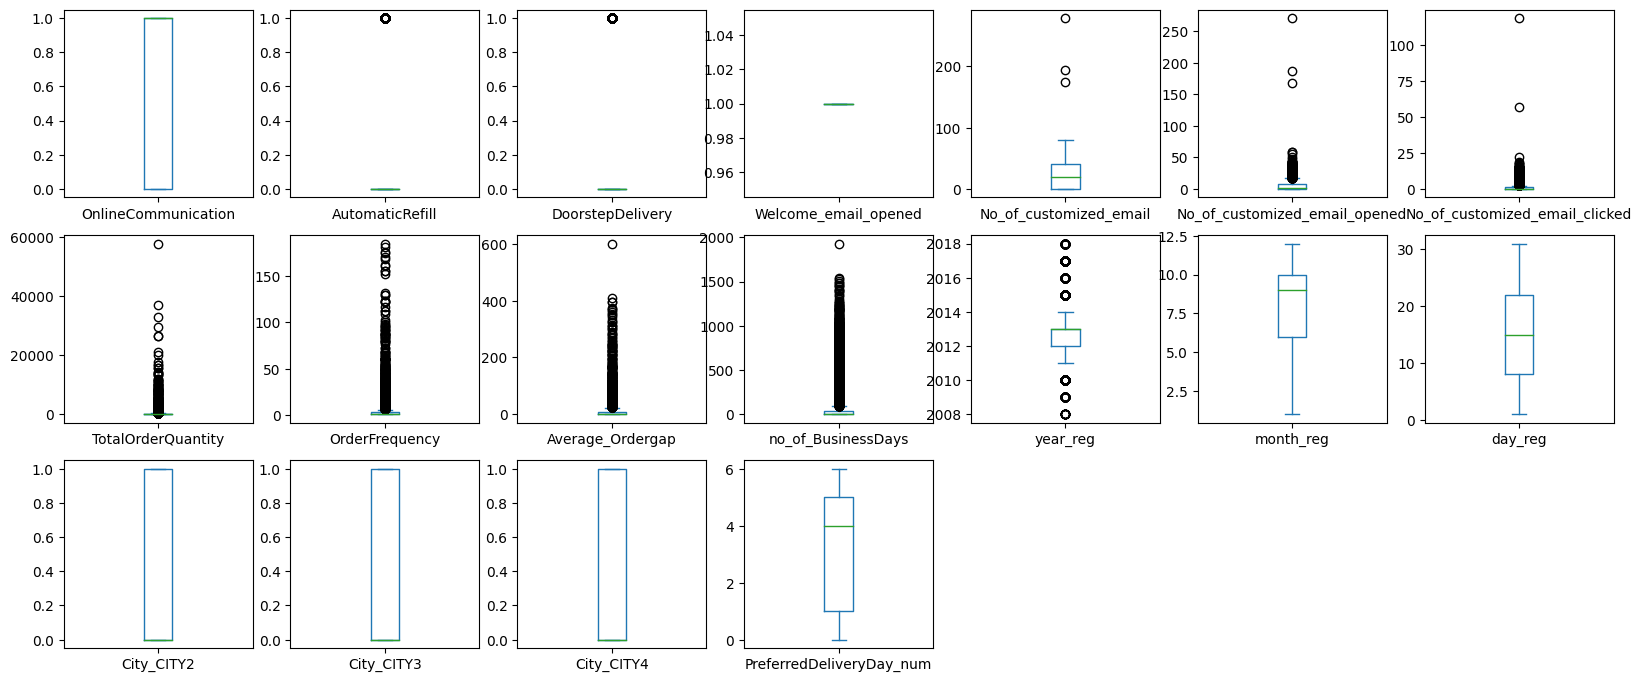

In [ ]:
test_df.plot(kind='box',subplots=True,layout=(7,7),figsize=(20,20))
plt.show()

In [ ]:
#checking the skewness for the columns having outliers
for column in ['Welcome_email_opened','No_of_customized_email_clicked','TotalOrderQuantity','OrderFrequency','no_of_BusinessDays','Average_Ordergap',]:
    skewness = test_df[column].skew()
    print(f"The skewness of {column} is {skewness:.2f}")

The skewness of Welcome_email_opened is 0.00
The skewness of No_of_customized_email_clicked is 15.45
The skewness of TotalOrderQuantity is 15.34
The skewness of OrderFrequency is 7.50
The skewness of no_of_BusinessDays is 3.38
The skewness of Average_Ordergap is 6.27


In [ ]:
# Applying square root transformation to selected columns
test_df['No_of_customized_email_clicked'] = np.sqrt(test_df['No_of_customized_email_clicked'])
test_df['TotalOrderQuantity'] = np.sqrt(test_df['TotalOrderQuantity'])
test_df['OrderFrequency'] = np.sqrt(test_df['OrderFrequency'])
test_df['no_of_BusinessDays'] = np.sqrt(test_df['no_of_BusinessDays'])
test_df['Average_Ordergap'] = np.sqrt(test_df['Average_Ordergap'])

In [ ]:
#checking the skewness for the columns having outliers
for column in ['Welcome_email_opened','No_of_customized_email_clicked','TotalOrderQuantity','OrderFrequency','no_of_BusinessDays','Average_Ordergap',]:
    skewness = test_df[column].skew()
    print(f"The skewness of {column} is {skewness:.2f}")

The skewness of Welcome_email_opened is 0.00
The skewness of No_of_customized_email_clicked is 1.57
The skewness of TotalOrderQuantity is 5.04
The skewness of OrderFrequency is 3.91
The skewness of no_of_BusinessDays is 2.05
The skewness of Average_Ordergap is 2.24


In [ ]:
test_df.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_num
0,0,0,0,1,0,0,0.000000,7.416198,1.000000,0.000000,0.000000,2010,10,22,0,0,1,4
1,1,1,0,1,46,37,2.645751,171.863318,12.961481,2.661453,34.496377,2008,11,17,1,0,0,6
2,0,1,0,1,60,26,2.000000,119.670381,11.045361,2.828427,31.240999,2011,1,24,0,0,1,0
3,0,0,0,1,45,0,0.000000,6.855655,1.000000,0.000000,0.000000,2010,9,18,1,0,0,6
4,1,0,0,1,13,8,1.414214,142.260325,11.357817,2.897473,32.908965,2010,10,2,1,0,0,1


In [ ]:
test_df.columns

Index(['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'Welcome_email_opened', 'No_of_customized_email',
       'No_of_customized_email_opened', 'No_of_customized_email_clicked',
       'TotalOrderQuantity', 'OrderFrequency', 'Average_Ordergap',
       'no_of_BusinessDays', 'year_reg', 'month_reg', 'day_reg', 'City_CITY2',
       'City_CITY3', 'City_CITY4', 'PreferredDeliveryDay_num'],
      dtype='object')

# Evaluation on Test Data

In [ ]:
test_predictions=smote_gbc.predict(test_df)

In [ ]:
test_predictions

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
ids

0       C17838
1       C12403
2       C19041
3       C24069
4       C26718
         ...  
5950    C32947
5951    C28951
5952    C38741
5953    C20407
5954    C27220
Name: CustomerID, Length: 5955, dtype: object

[**Predicting the Customer Retential Potential Level**]

In [ ]:
# assuming test_predictions is a list or numpy array and ids is a list of corresponding ids
submission = pd.DataFrame({'CustomerID': ids, 'RetentionPotential': test_predictions})
submission.head()

,CustomerID,RetentionPotential
0,C17838,0
1,C12403,1
2,C19041,1
3,C24069,1
4,C26718,2


In [ ]:
submission.to_csv('submission.csv',index=False)

# Pickle file


In [ ]:
import pickle
pickle.dump(smote_gbc, open('./classifier.pkl','wb'))

In [ ]:
#checking the pickle file
smote_gbc.predict([[0,0,0,1,0,0,0,7.416198,1,0.000000,0,2010,10,22,0,0,1,4]])

array([0])

# Clustering


In [ ]:
dfc=df.drop('RetentionPotential_num',axis=1)
dfc

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_num
0,0,0,0,1,29,29,1.000000,3.872983,1.000000,0.000000,0.000000,2012,9,28,1,0,0,1
1,1,1,1,1,95,88,3.162278,124.955992,13.638182,2.346354,32.000000,2010,12,19,1,0,0,0
2,0,0,0,1,0,0,0.000000,21.047565,3.605551,4.085622,14.730920,2010,10,3,1,0,0,6
3,0,0,0,1,30,27,2.000000,27.349589,2.645751,10.630146,28.124722,2010,11,27,0,0,1,1
4,1,1,0,1,64,18,3.162278,48.476799,5.830952,4.994114,29.120440,2009,12,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,1,1,0,1,0,0,0.000000,6.403124,1.000000,0.000000,0.000000,2018,1,17,1,0,0,0
23816,1,0,1,1,0,0,0.000000,7.483315,1.000000,0.000000,0.000000,2018,1,17,0,1,0,0
23817,1,0,0,1,0,0,0.000000,5.916080,1.000000,0.000000,0.000000,2018,1,17,0,1,0,2
23818,1,1,0,1,8,6,1.732051,10.000000,1.414214,1.414214,2.000000,2018,1,17,0,1,0,2


**Normalizing / scaling the data**
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [ ]:
from sklearn.preprocessing import StandardScaler
cols_to_standardize = ['No_of_customized_email','No_of_customized_email_opened','No_of_customized_email_clicked','TotalOrderQuantity','OrderFrequency','Average_Ordergap','no_of_BusinessDays','year_reg','month_reg','day_reg']
scaler = StandardScaler()
scaler.fit(dfc[cols_to_standardize])
dfc[cols_to_standardize] = scaler.transform(dfc[cols_to_standardize])
dfc

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,Welcome_email_opened,No_of_customized_email,No_of_customized_email_opened,No_of_customized_email_clicked,TotalOrderQuantity,OrderFrequency,Average_Ordergap,no_of_BusinessDays,year_reg,month_reg,day_reg,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_num
0,0,0,0,1,0.412539,2.793470,0.444579,-0.655578,-0.450009,-0.601758,-0.569120,-0.605558,0.339599,1.459897,1,0,0,1
1,1,1,1,1,3.705932,9.720608,2.849320,8.114879,8.926392,0.171922,3.379670,-1.630164,1.271576,0.413582,1,0,0,0
2,0,0,0,1,-1.034557,-0.611395,-0.667554,0.588436,1.483077,0.745423,1.248671,-1.630164,0.650258,-1.446534,1,0,0,6
3,0,0,0,1,0.462439,2.558651,1.556712,1.044913,0.770991,2.903395,2.901462,-1.630164,0.960917,1.343640,0,0,1,1
4,1,1,0,1,2.159035,1.501969,2.849320,2.575229,3.134125,1.044987,3.024333,-2.142467,1.271576,-1.330277,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,1,1,0,1,-1.034557,-0.611395,-0.667554,-0.472311,-0.450009,-0.601758,-0.569120,2.468259,-2.145673,0.181068,1,0,0,0
23816,1,0,1,1,-1.034557,-0.611395,-0.667554,-0.394069,-0.450009,-0.601758,-0.569120,2.468259,-2.145673,0.181068,0,1,0,0
23817,1,0,0,1,-1.034557,-0.611395,-0.667554,-0.507590,-0.450009,-0.601758,-0.569120,2.468259,-2.145673,0.181068,0,1,0,2
23818,1,1,0,1,-0.635358,0.093060,1.258717,-0.211777,-0.142700,-0.135439,-0.322321,2.468259,-2.145673,0.181068,0,1,0,2


 **KMeans**

In [ ]:
from sklearn.cluster import KMeans

# Create a KMeans object with 5 clusters, 10 iterations, and a random state of 1234
kmeans = KMeans(n_clusters=5, n_init=10, random_state=1234)

# Fit the KMeans model on the data in dfc
kmeans.fit(dfc)

# Get the predicted cluster labels for each sample in dfc
kmeans_clusters = kmeans.predict(dfc)

# Print the predicted cluster labels
print(kmeans_clusters)

[1 0 3 ... 1 1 1]


In [ ]:
# Create a Pandas DataFrame with two columns: "CustomerID" and "kmeans_cluster"
kmeans_results = pd.DataFrame({'CustomerID':train_ids , "kmeans_cluster" : kmeans_clusters} )
kmeans_results.head(20)

,CustomerID,kmeans_cluster
0,C37869,1
1,C33841,0
2,C29464,3
3,C28158,2
4,C22785,0
5,C18155,0
6,C40417,0
7,C40335,0
8,C19744,0
9,C38412,0


Indentify the number of clusters


In [ ]:
n_clusters_range = range(1, 11)
inertia = []  #Inertia: Sum of squared distances of samples to their closest cluster center

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters,n_init=10)
    kmeans.fit(dfc)
    inertia.append(kmeans.inertia_)


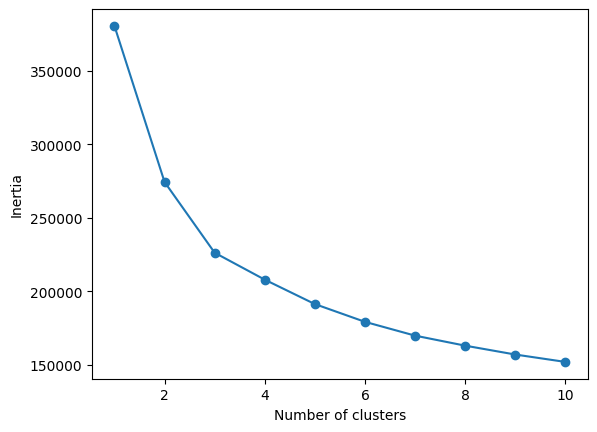

In [ ]:
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
best_kmeans = KMeans(n_clusters=5,n_init=10,random_state=1234)
best_kmeans.fit(dfc)
best_kmeans_labels = best_kmeans.predict(dfc)
best_kmeans_labels

array([1, 0, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans_results = pd.DataFrame({"CustomerID":train_ids,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head(20)

,CustomerID,kmeans_cluster
0,C37869,1
1,C33841,0
2,C29464,3
3,C28158,2
4,C22785,0
5,C18155,0
6,C40417,0
7,C40335,0
8,C19744,0
9,C38412,0


**Test data**

In [ ]:
#fitting with k=4
best_kmeans2 = KMeans(n_clusters=5,n_init=10,random_state=1234)
best_kmeans2.fit(test_df)
best_kmeans_labels2 = best_kmeans2.predict(test_df)
best_kmeans_labels2

array([0, 2, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans_results2 = pd.DataFrame({"CustomerID":ids,"kmeans_cluster":best_kmeans_labels2})
kmeans_results2.head(20)

,CustomerID,kmeans_cluster
0,C17838,0
1,C12403,2
2,C19041,1
3,C24069,0
4,C26718,2
5,C31010,0
6,C24517,0
7,C30981,0
8,C23833,0
9,C25929,0
